In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_in = open('2010to2017.pkl', 'rb')
dataset = pickle.load(data_in)

In [3]:
def Labelset(df):
    # droping the unknow values
    df = df.dropna()


    # Putting the index as a column
    df = df.reset_index()
#     df['Year'] = pd.DatetimeIndex(df['index']).year
    df['Month'] = pd.DatetimeIndex(df['index']).month
    df['Day'] = pd.DatetimeIndex(df['index']).day 

    # The "stage" column is really categorical, not numeric. so covert that to a one-hot:
#     Stage = df.pop("stage")
#     df['Bud'] = (Stage == 1) *1.0
#     df['Bloom'] = (Stage == 2) *1.0
#     df['Veraison'] = (Stage == 3) *1.0
#     df['Harvest'] = (Stage == 4)*1
#     df = df.drop('index',axis=1)
    df = df.drop('type', axis=1)
    return df

In [4]:
dataset = Labelset(dataset)

In [10]:
dataset = dataset.drop(['Month'], axis=1)

In [16]:
dataset = dataset.rename({'index':'Month'}, axis='columns')


In [17]:
df = dataset.set_index('Month')

In [19]:
ts = df["stage"]

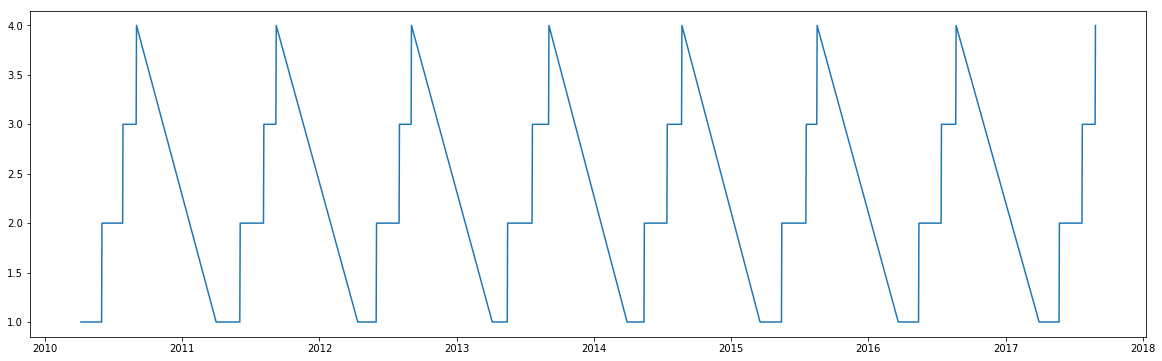

In [22]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
plt.plot(ts)

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print("Results of Dicke-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

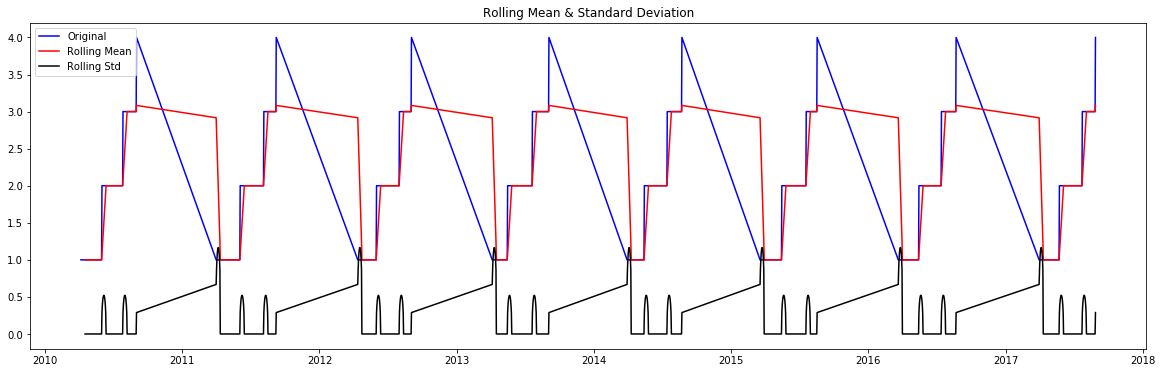

Results of Dicke-Fuller Test:
Test Statistic                   -4.286707
p-value                           0.000468
#Lags Used                        2.000000
Number of Observations Used    1209.000000
Critical Value (1%)              -3.435770
Critical Value (5%)              -2.863934
Critical Value (10%)             -2.568044
dtype: float64


In [24]:
test_stationarity(ts)

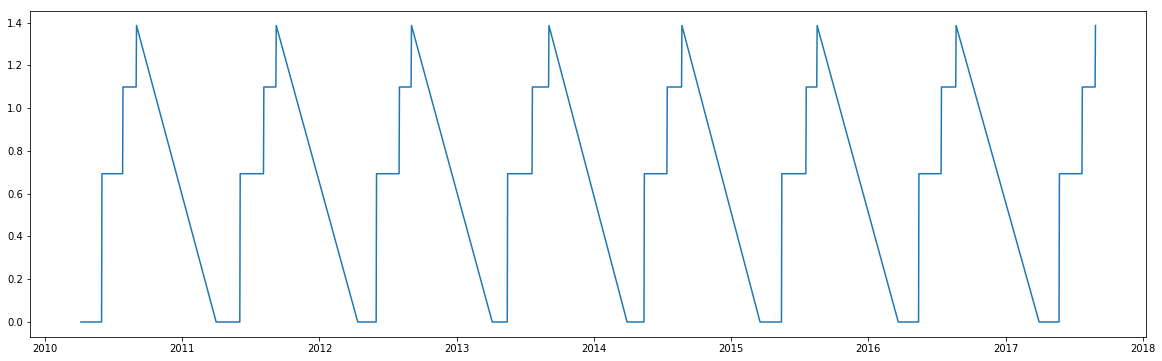

In [27]:
ts_log = np.log(ts)
plt.plot(ts_log)

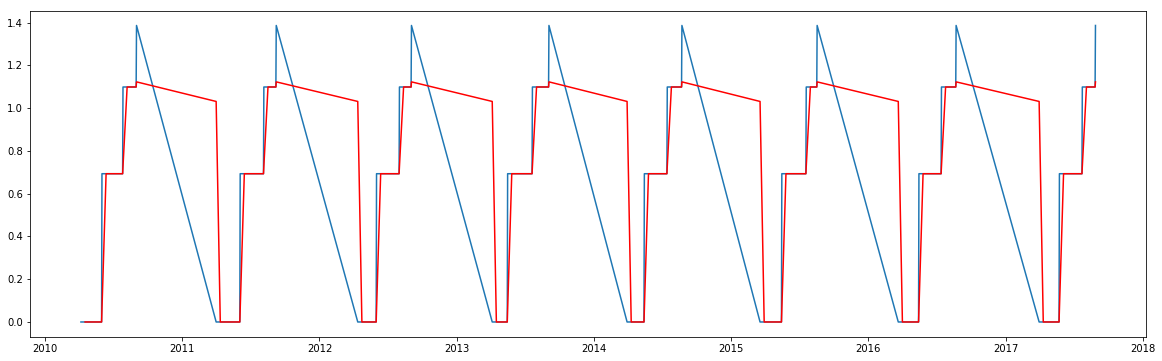

In [28]:
# Moving average
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [29]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
2010-04-06    NaN
2010-04-07    NaN
2010-04-08    NaN
2010-04-09    NaN
2010-04-10    NaN
2010-04-11    NaN
2010-04-12    NaN
2010-04-13    NaN
2010-04-14    NaN
2010-04-15    NaN
2010-04-16    NaN
2010-04-17    0.0
Name: stage, dtype: float64

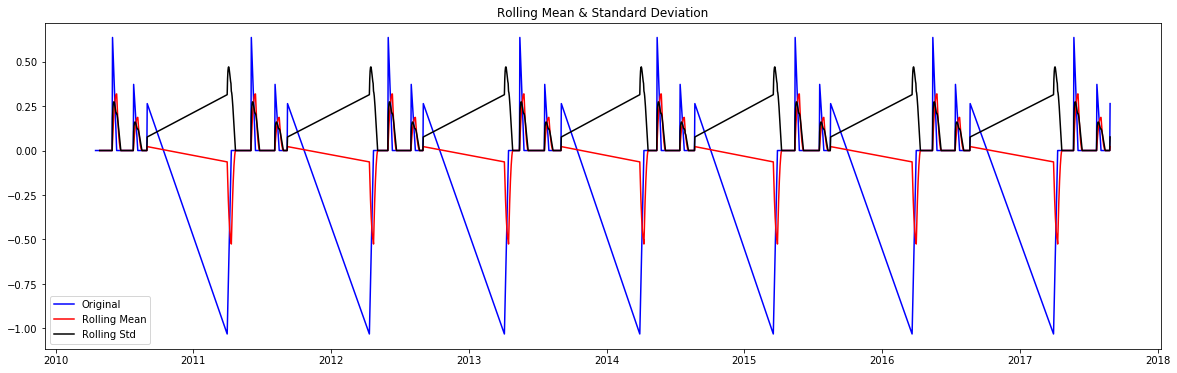

Results of Dicke-Fuller Test:
Test Statistic                -9.788759e+00
p-value                        6.437272e-17
#Lags Used                     5.000000e+00
Number of Observations Used    1.195000e+03
Critical Value (1%)           -3.435834e+00
Critical Value (5%)           -2.863962e+00
Critical Value (10%)          -2.568059e+00
dtype: float64


In [30]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

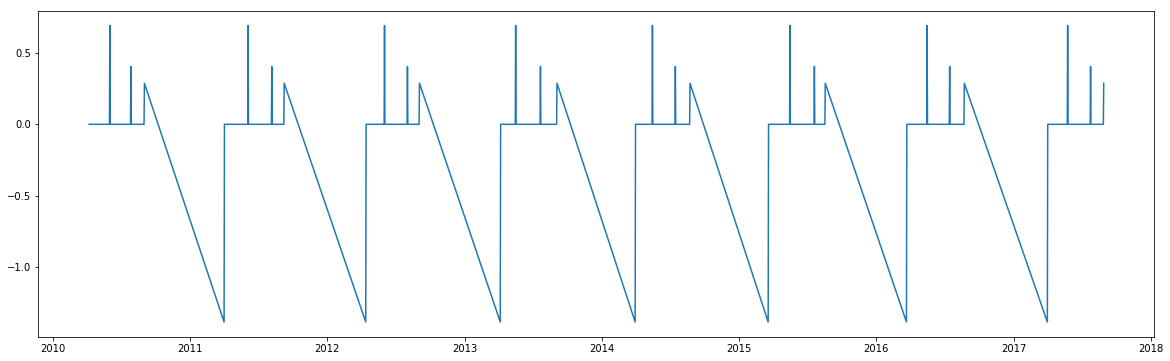

In [34]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

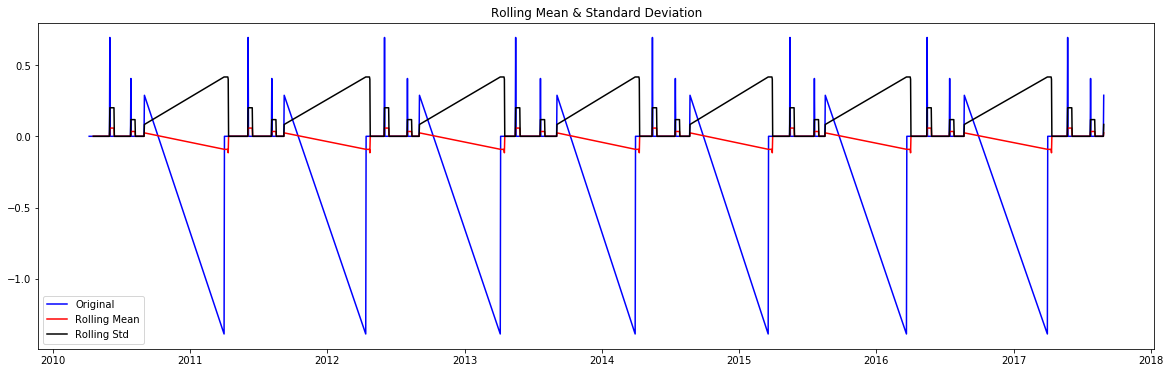

Results of Dicke-Fuller Test:
Test Statistic                  -40.155594
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1210.000000
Critical Value (1%)              -3.435766
Critical Value (5%)              -2.863932
Critical Value (10%)             -2.568043
dtype: float64


In [35]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [47]:
df_ts = pd.DataFrame(ts_log)
# df_ts['Month'] = pd.to_datetime(df_ts['Month'])
# df_ts = df.set_index('Month')
# ['Month'] = pd.to_datetime(df['Month'])

In [48]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_ts.divide)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

TypeError: len() of unsized object

In [49]:
df_ts

,stage
Month,
2010-04-06,0.000000
2010-04-07,0.000000
2010-04-08,0.000000
2010-04-09,0.000000
2010-04-10,0.000000
2010-04-11,0.000000
2010-04-12,0.000000
2010-04-13,0.000000
2010-04-14,0.000000
